# Decision Tree Algorithm - insurance_charge_prediction
## MODEL CREATION PHASE

## read the dataset

In [1]:
import pandas as pd 
dataset = pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


## convert categorical data into numerical data

In [2]:
dataset = pd.get_dummies(dataset,drop_first=True,dtype=int)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


## split Input and Output

In [3]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [4]:
independent = dataset[['age', 'bmi', 'children',  'sex_male', 'smoker_yes' ]]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [5]:
dependent = dataset[['charges']]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


## split train and test set 


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.20, random_state=0)

In [7]:
x_test

,age,bmi,children,sex_male,smoker_yes
578,52,30.200,1,1,0
610,47,29.370,1,0,0
569,48,40.565,2,1,1
1034,61,38.380,0,1,0
198,51,18.050,0,0,0
...,...,...,...,...,...
1084,62,30.495,2,0,0
726,41,28.405,1,1,0
1132,57,40.280,0,1,0
725,30,39.050,3,0,1


In [24]:
y_test

,charges
578,9724.53000
610,8547.69130
569,45702.02235
1034,12950.07120
198,9644.25250
...,...
1084,15019.76005
726,6664.68595
1132,20709.02034
725,40932.42950


## model creation 

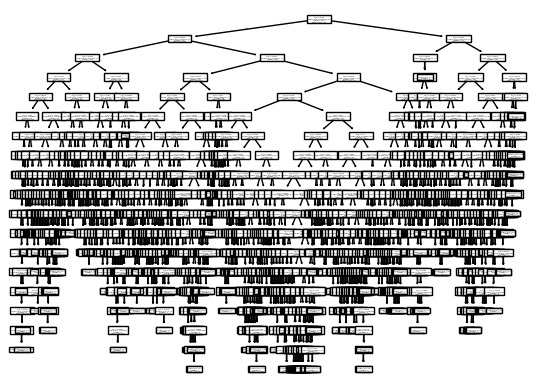

In [154]:
import matplotlib.pyplot as plt 
from sklearn import tree 
tree.plot_tree(regressor)
plt.show()

In [223]:
"""
criterion   {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
splitter   {“best”, “random”}, default=”best”
max_features  int, float or {“sqrt”, “log2”}, default=None
"""
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion="absolute_error",splitter="best",random_state=0, max_features="sqrt")
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_features='sqrt',
                      random_state=0)

### Tree visualization

## test the model 

In [224]:
y_predict = regressor.predict(x_test)
y_predict

array([ 9377.9047  ,  7050.642   , 44202.6536  , 12574.049   ,
        9264.797   , 21984.47061 ,  1615.7667  , 11411.685   ,
        7151.092   ,  5325.651   ,  4827.90495 , 11150.78    ,
       11881.358   ,  4992.3764  , 18246.4955  , 10381.4787  ,
       12142.5786  ,  3292.52985 ,  6455.86265 , 33750.2918  ,
       24869.8368  , 12269.68865 ,  9625.92    , 21774.32215 ,
        1682.597   ,  3875.7341  ,  2527.81865 ,  7418.522   ,
        5227.98875 ,  8027.968   ,  7151.092   , 48673.5588  ,
       12981.3457  , 10226.2842  , 16420.49455 ,  3554.203   ,
        8733.22925 , 36950.2567  , 40941.2854  ,  1880.07    ,
        2527.81865 ,  2866.091   , 19350.3689  , 49577.6624  ,
       36307.7983  ,  2801.2588  , 10381.4787  ,  6272.4772  ,
        4719.52405 , 26236.57997 ,  2473.3341  ,  4466.6214  ,
       27218.43725 , 44400.4064  , 11093.6229  , 19673.33573 ,
        2897.3235  ,  8782.469   ,  8965.79575 ,  8604.48365 ,
        1635.73365 , 41999.52    , 27941.28758 , 25333.

## Evaluation metrics 

In [225]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_predict)
print(f" THE ACCURACY OF THE MODEL : {r_score}")    # THE ACCURACY OF THE MODEL : 0.7538062098354589   --- using criterion="absolute_error",splitter="random"

 THE ACCURACY OF THE MODEL : 0.7885524275111394


## save the model 

In [ ]:
# import pickle 
# pickle.dump(regressor, open(" ","wb"))

In [226]:
regressor.predict([[ 52, 30.200, 1, 1, 0 ]])

E:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([9377.9047])